In [1]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*10,3), np.float32)
objp[:,:2] = np.mgrid[0:10,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [3]:
path = '.\catpics\calib_radial.jpg'


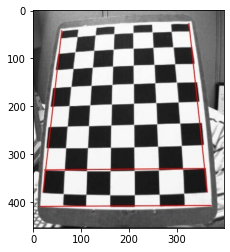

In [4]:
imgmp = mpimg.imread(path)
fig = plt.imshow(imgmp)

#images = glob.glob('.\catpics\calib_radial.jpg')
#print(len(images))

In [16]:
def calibrateGrid(path, dim1=6, dim2=6):
    imag = cv.imread(path)
    #fig = cv.imshow('img', imag)
    #cv.waitKey()
    gray = cv.cvtColor(imag, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (dim1,dim2), None)
    print(ret)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(imag, (dim1,dim2), corners2, ret)
        imS = cv.resize(imag, (960, 540))
        cv.imshow('img', imS)
        cv.waitKey()


In [24]:
path = '.\catpics\\narrow.jpg'
calibrateGrid(path, 6, 4)


True


In [15]:
objpoints

[array([[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [6., 0., 0.],
        [7., 0., 0.],
        [8., 0., 0.],
        [9., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [6., 1., 0.],
        [7., 1., 0.],
        [8., 1., 0.],
        [9., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [6., 2., 0.],
        [7., 2., 0.],
        [8., 2., 0.],
        [9., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [6., 3., 0.],
        [7., 3., 0.],
        [8., 3., 0.],
        [9., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5

In [11]:
for fname in images[:1]:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (15,7), None)
    # If found, add object points, image points (after refining them)
    print(ret)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (10,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

1
False


In [7]:
print(objpoints)

[]
